In [1]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline


2024-09-10 20:38:58.772438: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-10 20:38:58.797049: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 20:38:59.018693: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 20:38:59.227324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 20:38:59.375979: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
def load_images_from_path(path, label):
    images, labels = [], []
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append(label)
    return images, labels


In [13]:
def show_images(images):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20),  subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

In [11]:
x_train, y_train, x_test, y_test = [], [], [], []

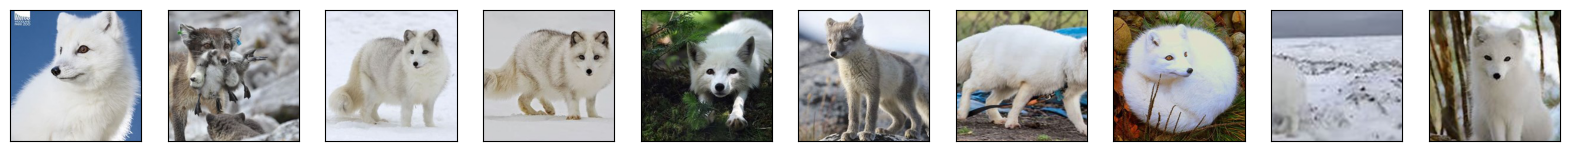

In [12]:
images, labels = load_images_from_path('/home/melika_yazdanpanah/deepshahab/deeplearning_toturial/deeplearning/CNN/wildlife/arctic-wildlife/train/arctic_fox', 0)
show_images(images)


In [14]:
x_train += images
y_train += labels

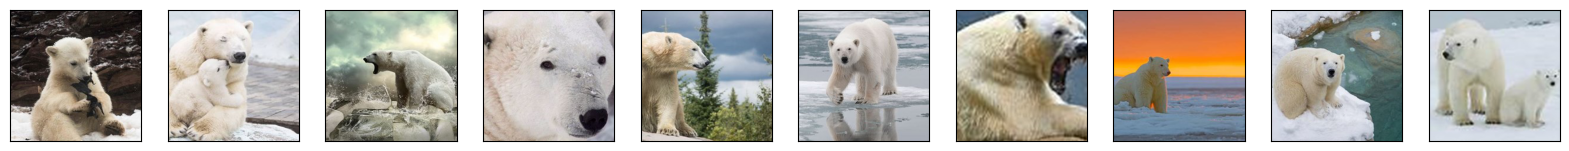

In [16]:
images, labels = load_images_from_path('/home/melika_yazdanpanah/deepshahab/deeplearning_toturial/deeplearning/CNN/wildlife/arctic-wildlife//train/polar_bear', 1)
show_images(images)
x_train += images
y_train += labels

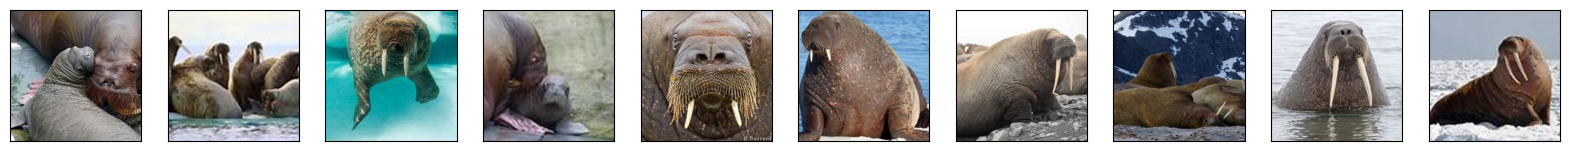

In [17]:
images, labels = load_images_from_path('/home/melika_yazdanpanah/deepshahab/deeplearning_toturial/deeplearning/CNN/wildlife/arctic-wildlife/train/walrus', 2)
show_images(images)
x_train += images
y_train += labels

In [ ]:
/home/melika_yazdanpanah/deepshahab/deeplearning_toturial/deeplearning/CNN/wildlife/arctic-wildlife/

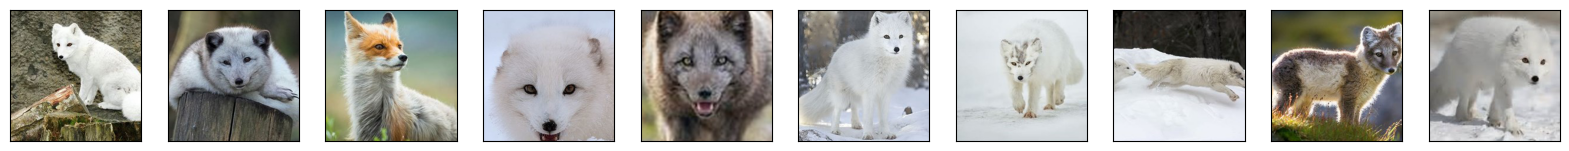

In [19]:
images, labels = load_images_from_path('/home/melika_yazdanpanah/deepshahab/deeplearning_toturial/deeplearning/CNN/wildlife/arctic-wildlife/test/arctic_fox', 0)
show_images(images)
x_test += images
y_test += labels


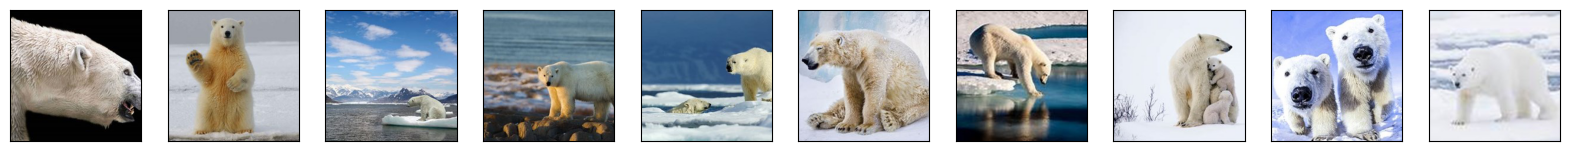

In [20]:
images, labels = load_images_from_path('/home/melika_yazdanpanah/deepshahab/deeplearning_toturial/deeplearning/CNN/wildlife/arctic-wildlife/test/polar_bear', 1)
show_images(images)
x_test += images
y_test += labels

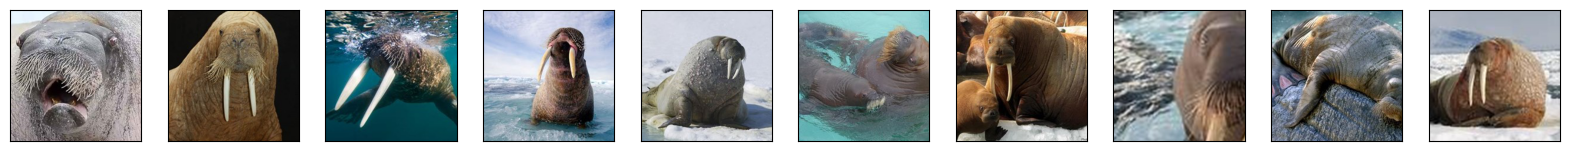

In [21]:
images, labels = load_images_from_path('/home/melika_yazdanpanah/deepshahab/deeplearning_toturial/deeplearning/CNN/wildlife/arctic-wildlife/test/walrus', 2)
show_images(images)
x_test += images
y_test += labels

In [22]:
import numpy as np
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
y_train = np.array(y_train)
y_test = np.array(y_test)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [24]:
model = Sequential()


In [25]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))


/home/melika_yazdanpanah/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1725993994.975748   24349 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-10 22:16:34.980187: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [26]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))


In [27]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))


In [28]:
model.add(Dense(3, activation='softmax'))
